[[ 0.  0. 12.  8.  8.  7.  0.  0.]
 [ 0.  3. 16. 16. 11.  7.  0.  0.]
 [ 0.  2. 14.  1.  0.  0.  0.  0.]
 [ 0.  5. 14.  5.  0.  0.  0.  0.]
 [ 0.  2. 15. 16.  9.  0.  0.  0.]
 [ 0.  0.  0.  2. 16.  2.  0.  0.]
 [ 0.  0.  4.  8. 16.  4.  0.  0.]
 [ 0.  0. 11. 14.  9.  0.  0.  0.]]
размерность данных:  (1797, 8, 8)


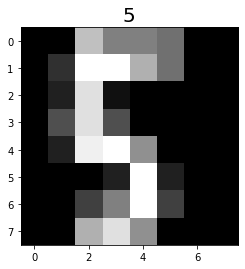

In [25]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


from sklearn import datasets

# Загружаем датасет с картинками 8х8
digits = datasets.load_digits()

X = digits.images
y = digits.target

n = 25
plt.title(y[n],size=20)
plt.imshow(X[n,:,:],cmap='gray')
print(X[n,:,:])
print('размерность данных: ',X.shape)

X = X.reshape(-1,64) # Не забываем преобразовать данные в матрицу

Предсказание: 9 
На самом деле: 9


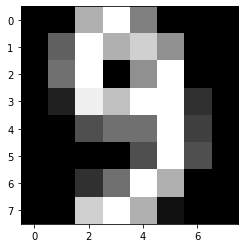

In [53]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

model = KNeighborsClassifier(n_neighbors=3)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

ind=1
plt.imshow(X_test[ind,:].reshape(8,8),cmap='gray')
print('Предсказание:',y_pred[ind], '\nНа самом деле:', y_test[ind])

## Как оценить качество нашей модели?

0.98989898989899
Предсказание: 5 
На самом деле: 9


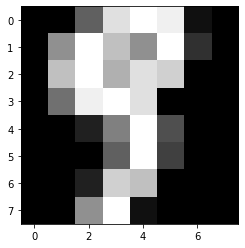

In [54]:
# Посчитаем количество долю правильно предсказанных меток:

accuracy = np.sum(y_pred==y_test)/len(y_test)
print(accuracy)

# Посмотрим, на каких картинках мы ошиблись
X_wrong=X_test[y_pred!=y_test]
y_wrong_pred = y_pred[y_pred!=y_test]
y_wrong_test = y_test[y_pred!=y_test]

ind=4
plt.imshow(X_wrong[ind,:].reshape(8,8),cmap='gray')
print('Предсказание:',y_wrong_pred[ind], '\nНа самом деле:', y_wrong_test[ind])

In [55]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_test, y_pred))

[[55  0  0  0  0  0  0  0  0  0]
 [ 0 55  0  0  0  0  0  0  0  0]
 [ 0  0 52  0  0  0  0  0  0  0]
 [ 0  0  0 56  0  0  0  0  0  0]
 [ 0  0  0  0 64  0  0  0  0  0]
 [ 0  0  0  0  0 73  0  0  0  0]
 [ 0  0  0  0  0  0 57  0  0  0]
 [ 0  0  0  0  0  0  0 61  0  1]
 [ 0  1  0  0  0  0  0  0 51  0]
 [ 0  0  0  1  1  1  0  0  1 64]]


## Вопрос на засыпку: в чём подвох? Простейшая модель распознала картинки с точностью <font color=red>99%</font>! Может, не нужны никакие нейросети?